# Analyse graphique des données (EDA)

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [70]:
df1 = pd.read_csv("https://storage.googleapis.com/h3-data/price_availability.csv",sep=';', index_col=0)
df2 = pd.read_csv("https://storage.googleapis.com/h3-data/listings_final.csv",sep=';', index_col=0)

/home/maxime/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [72]:
df = pd.merge(df1.groupby('listing_id').local_price.mean(), df2, on='listing_id')

In [41]:
df.head()

,listing_id,local_price,name,type,city,neighborhood,latitude,longitude,person_capacity,beds,bedrooms,bathrooms,is_rebookable,is_new_listing,is_fully_refundable,is_host_highly_rated,is_business_travel_ready,pricing_weekly_factor,pricing_monthly_factor
0,56093,170.000000,Beau duplex dans le Marais,entire_home,Paris,3e arrondissement,48.867284,2.358431,4,2,1,1.0,False,False,True,True,False,0.88,1.0
1,57207,49.952756,Belle Chambre pour court,private_room,Paris,Vaugirard,48.846184,2.304455,2,1,1,1.0,False,False,True,False,False,0.87,1.0
2,114543,107.374026,Charming 1bdr 55m² - Eiffel Tower,entire_home,Paris,NaN,48.849530,2.290219,2,1,1,1.0,False,False,True,True,False,0.90,0.9
3,149534,169.000000,GREAT WARM FULL APT LE HAUT MARAIS,entire_home,Paris,NaN,48.866360,2.361844,4,2,1,1.0,False,False,True,True,False,1.00,0.4
4,164255,75.876209,Perfect place in Le Marais - Paris,entire_home,Paris,3e arrondissement,48.861398,2.364299,4,2,1,1.0,False,False,True,False,False,1.00,1.0


### Diagrammes de répartition des données (type gaussienne sur les données)

(array([304., 251., 191.,  98.,  52.,  34.,  19.,   9.,  11.,   7.,   1.,
          5.,   3.,   7.,   1.,   0.,   3.,   0.,   1.,   0.,   0.,   1.,
          0.,   0.,   1.]),
 array([  17.86372361,   88.37280161,  158.88187961,  229.3909576 ,
         299.9000356 ,  370.4091136 ,  440.9181916 ,  511.4272696 ,
         581.9363476 ,  652.4454256 ,  722.9545036 ,  793.46358159,
         863.97265959,  934.48173759, 1004.99081559, 1075.49989359,
        1146.00897159, 1216.51804959, 1287.02712758, 1357.53620558,
        1428.04528358, 1498.55436158, 1569.06343958, 1639.57251758,
        1710.08159558, 1780.59067358]),
 <BarContainer object of 25 artists>)

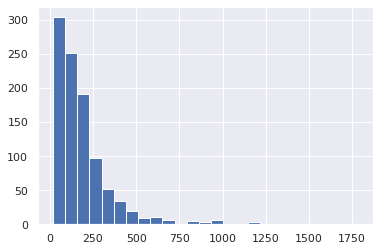

In [77]:
plt.hist(df.local_price, bins = 25)

### Vérification du nombre de données

In [79]:
df.count()

listing_id                  999
local_price                 999
name                        999
type                        999
city                        999
neighborhood                934
latitude                    999
longitude                   999
person_capacity             999
beds                        999
bedrooms                    999
bathrooms                   999
is_rebookable               999
is_new_listing              999
is_fully_refundable         999
is_host_highly_rated        999
is_business_travel_ready    999
pricing_weekly_factor       999
pricing_monthly_factor      999
dtype: int64

Taux de représentation des données :

In [80]:
100 - (df.isna().sum() / df.shape[0] * 100)

listing_id                  100.000000
local_price                 100.000000
name                        100.000000
type                        100.000000
city                        100.000000
neighborhood                 93.493493
latitude                    100.000000
longitude                   100.000000
person_capacity             100.000000
beds                        100.000000
bedrooms                    100.000000
bathrooms                   100.000000
is_rebookable               100.000000
is_new_listing              100.000000
is_fully_refundable         100.000000
is_host_highly_rated        100.000000
is_business_travel_ready    100.000000
pricing_weekly_factor       100.000000
pricing_monthly_factor      100.000000
dtype: float64

Aucune donnée à nettoyer.

### Boites à moustache

<AxesSubplot:xlabel='pricing_weekly_factor', ylabel='local_price'>

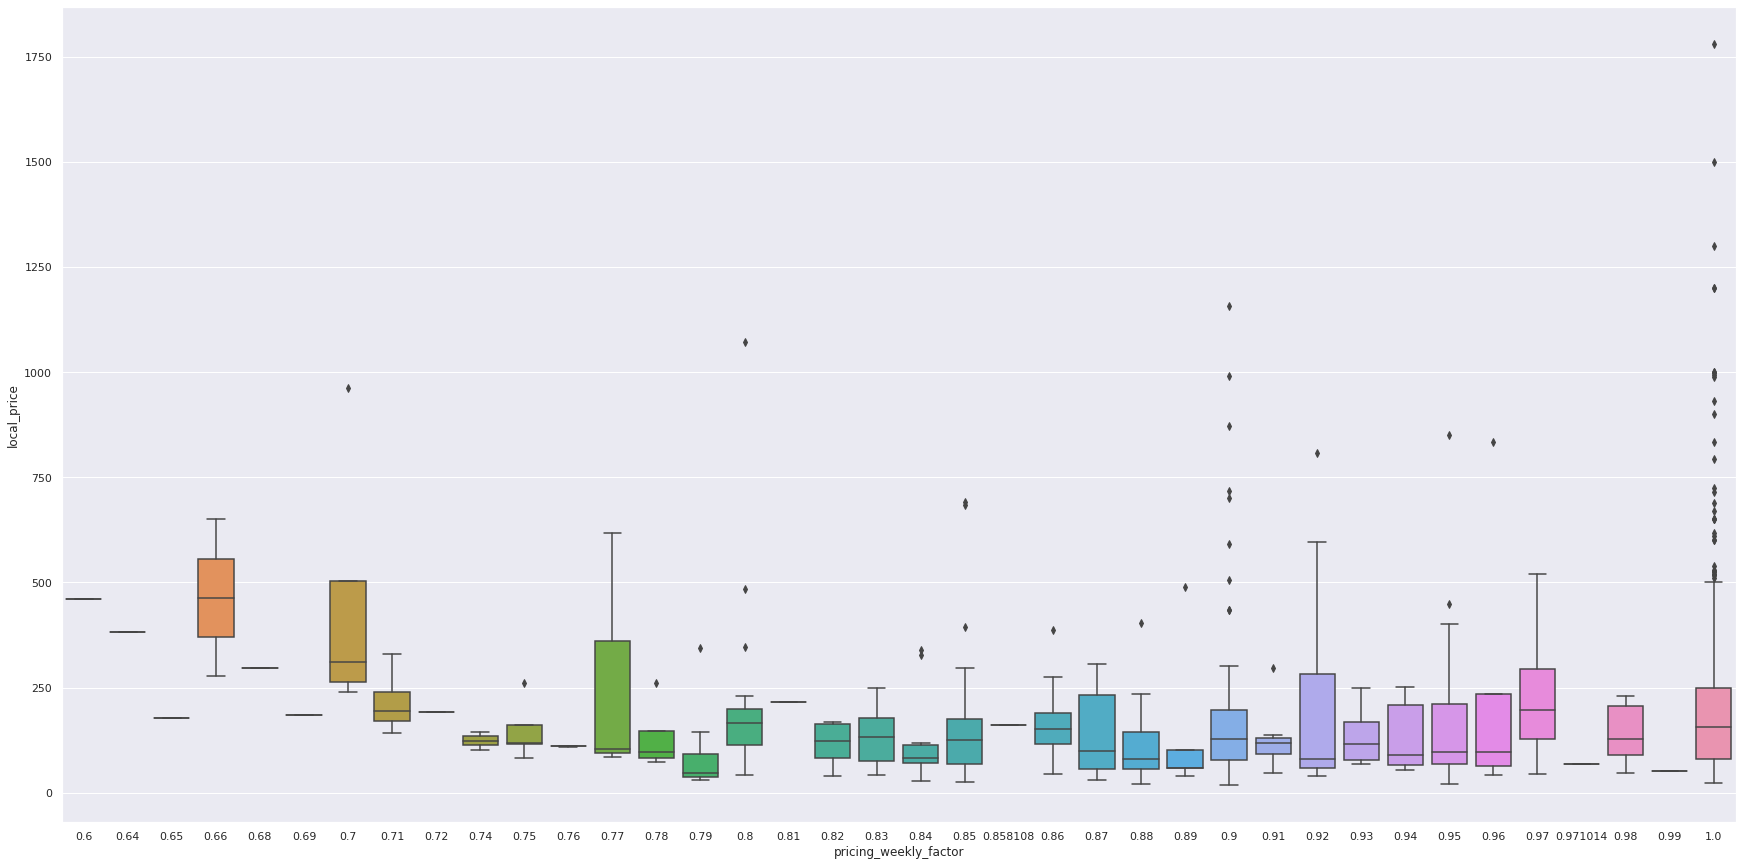

In [59]:
fig = plt.gcf()
fig.set_size_inches(30, 15)
sns.boxplot(x='pricing_weekly_factor', y='local_price', data=df)

### Heatmap

<function matplotlib.pyplot.show(close=None, block=None)>

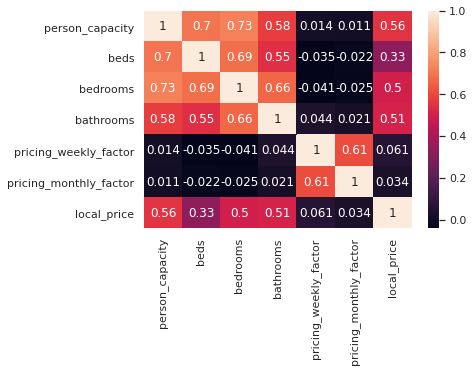

In [69]:
cleans = df[['person_capacity', 'beds', 'bedrooms', 'bathrooms', 'pricing_weekly_factor', 'pricing_monthly_factor', 'local_price']]
sns.heatmap(cleans.corr(), annot = True)
plt.show

#### Observations sur les corrélations (les plus pertinentes)

Il y a une correlation : 
- de 0.73 entre la capacité de personnes et le nombre de chambres
- de 0.70 entre la capacité de personnes et le nombre de lits
- de 0.66 entre le nombre de lits et le nombre de chambres